# Decision Trees INCLASS using Scikitlearn
Easy setup,works with categories as well as numbers

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#want to filter the seaborn warnings
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)

## Get the iris dataset, then train a decision tree on it and then see how accurate it is

In [83]:
from sklearn import datasets
iris = datasets.load_iris()
dfi = pd.DataFrame(iris.data, columns=iris.feature_names)
dfi

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [84]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [85]:
mapper={v:i for v,i in enumerate(iris.target_names)}

def fun(x):
    return mapper[x]
vfunc=np.vectorize(fun)
dfi['target']=vfunc(iris.target)
dfi


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#add the target in iris.target,iris.target_names, mapper dict, function to map, map to the array

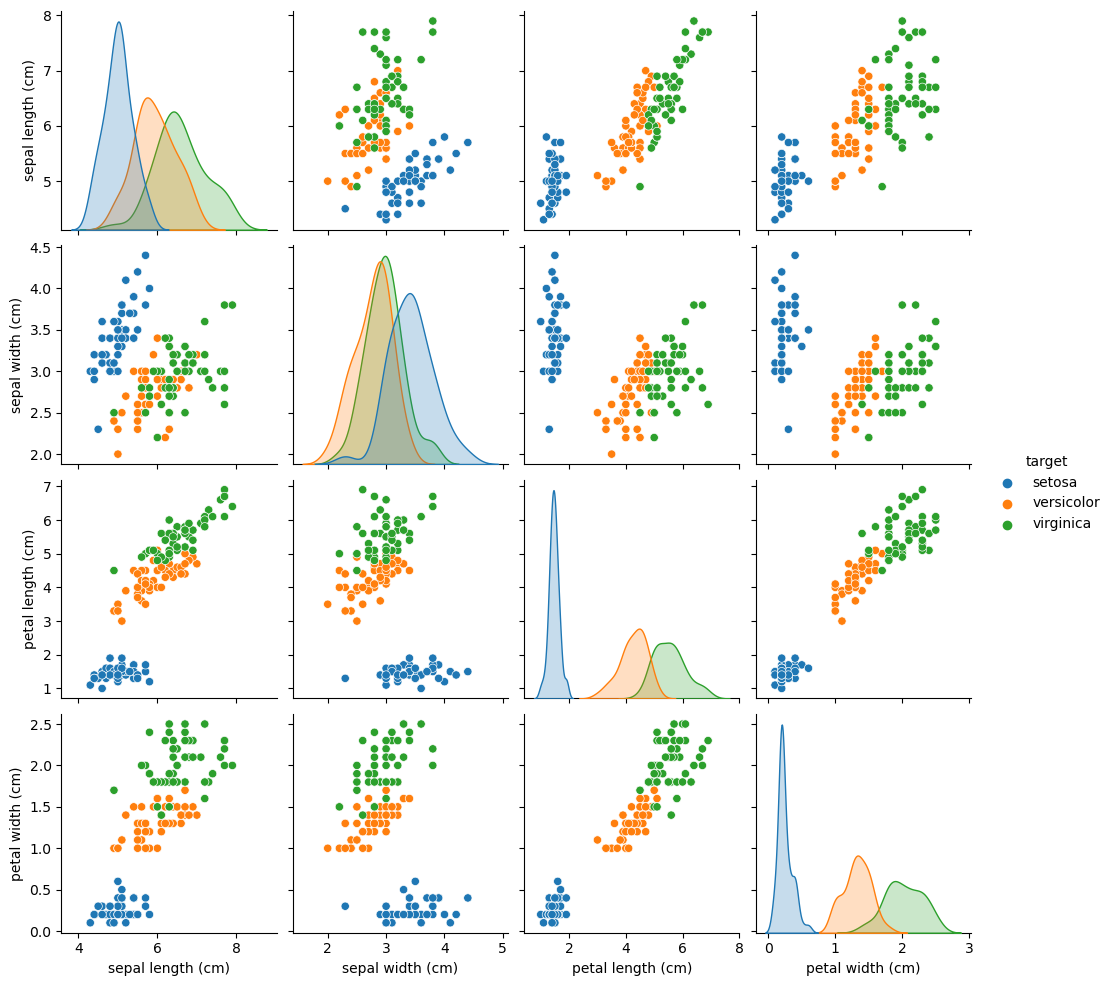

In [86]:
#see if anything is obvious, pairplot
sns.pairplot(dfi, hue='target')

## It looks like Setosa is easy to distinguish from Versicolor and Virginica, but Versicolor and Virginica are not linearly seperable

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
dfi

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Split out a train and test set

In [89]:
# dfi.drop(columns='target', inplace=True)

In [90]:
#split out a test set
from sklearn.model_selection import train_test_split
train, test, train_y, test_y = train_test_split(dfi, iris.target, test_size = 0.2,stratify=iris.target, random_state = 42)


In [91]:
train.drop(columns='target', inplace=True)
test.drop(columns='target', inplace=True)

In [92]:
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


### Train classifier

In [93]:
train_y

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [94]:
#train tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X=train,y=train_y);

In [95]:
preds=clf.predict(test)
accuracy_score(test_y, preds)

0.9333333333333333

In [96]:
clf.score(test, test_y)

0.9333333333333333

In [97]:
# from util_disp import plot_decision_regions
# dfi = pd.DataFrame(iris.data, columns=iris.feature_names)
# dfi['target']=iris.target
# clf = tree.DecisionTreeClassifier(max_depth=4)
# clf.fit(X=iris.data[:,[0,1]],y=iris.target);
# plot_decision_regions(X=iris.data[:,[0,1]], y=iris.target, classifier=clf, resolution=0.02)

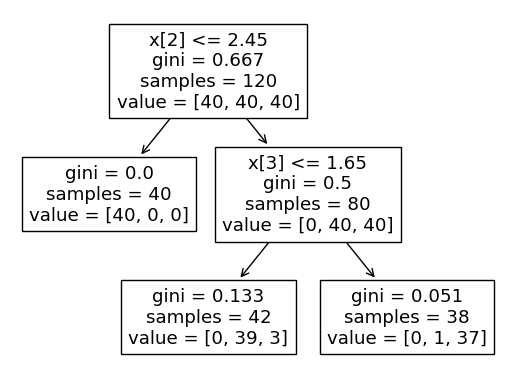

In [98]:
tree.plot_tree(clf);

### Check out the splits and why

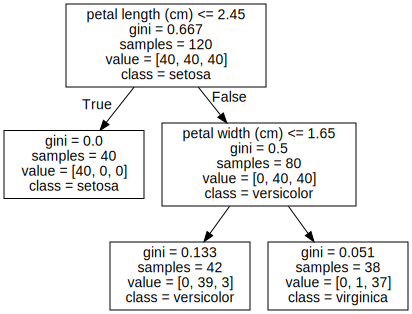

In [99]:
#just another way to look at the data, possibly with a little better info
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],class_names=[mapper[0],mapper[1],mapper[2]])  
graph = graphviz.Source(dot_data) 
graph.render("Synthetic")
graph

### Where were The errors? 

From pairplot it looks like setosa is linearly seperable, so the classifier should do well on it, the other 2 will be where the problems occur

In [100]:
#which rows are wrong?
test[preds!=test_y]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
134,6.1,2.6,5.6,1.4
77,6.7,3.0,5.0,1.7


In [101]:
#which preds were wrong?
for pred,tst_y in zip(preds,test_y):
    if(pred!=tst_y):
        print(f'pred={fun(pred)} should have been {fun(tst_y)}')

pred=versicolor should have been virginica
pred=virginica should have been versicolor


Look at pairplot above, setosa is clearly linearly seperable from virginica and versicolor
You would expect no classification errors for sertosis, which is what we have.